**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
TXT_FOLDER_REGION = "hic_intact_K562_ENCSR479XDG"

## Import data

In [3]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.hic_intact.Loop_A.bed.gz 
K562.hg38.hic_intact.Loop_B.bed.gz 
K562.hg38.hic_intact.TAD.bedpe.gz 
summary 


In [4]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

description.tsv 
K562.hg38.hic_intact.Loop.tsv 
K562.hg38.hic_intact.TAD.tsv 
metadata.label.tsv 


In [5]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cname     = dat
vec_txt_cname = dat$Name
fun_display_table(head(dat))

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Name,Name given to a region; Use '.' if no name is assigned.
Group,Assay Name
Label,Region Label


In [7]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "K562.hg38.hic_intact.Loop.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_loop = dat
fun_display_table(head(dat))

Chrom_A,ChromStart_A,ChromEnd_A,Region_A,Length_A,Chrom_B,ChromStart_B,ChromEnd_B,Region_B,Length_B,Name,Observed,Centroid_A,Centroid_B,Radius,Distance,Size
chr1,770000,780000,chr1:770000-780000,10000,chr1,840000,850000,chr1:840000-850000,10000,chr1:770000-780000|chr1:840000-850000,19,775000,845000,0,70000,10000
chr1,904000,906000,chr1:904000-906000,2000,chr1,976000,978000,chr1:976000-978000,2000,chr1:904000-906000|chr1:976000-978000,8,905000,977000,0,72000,2000
chr1,920000,925000,chr1:920000-925000,5000,chr1,1060000,1065000,chr1:1060000-1065000,5000,chr1:920000-925000|chr1:1060000-1065000,17,917500,1062500,5000,145000,5000
chr1,980000,990000,chr1:980000-990000,10000,chr1,1290000,1300000,chr1:1290000-1300000,10000,chr1:980000-990000|chr1:1290000-1300000,34,988333,1291666,7454,303333,10000
chr1,984000,985000,chr1:984000-985000,1000,chr1,1063000,1064000,chr1:1063000-1064000,1000,chr1:984000-985000|chr1:1063000-1064000,9,984500,1063500,0,79000,1000
chr1,1000000,1005000,chr1:1e+06-1005000,5000,chr1,1060000,1065000,chr1:1060000-1065000,5000,chr1:1e+06-1005000|chr1:1060000-1065000,44,1002500,1060000,2500,57500,5000


## Explore

In [8]:
dat = dat_region_loop
summary(dat$Distance)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8000   65000  147500  276793  318000 9085714 

In [9]:
dat = dat_region_loop
table(dat$Size)


 1000  2000  5000 10000 
14686 10059 13906  7353 

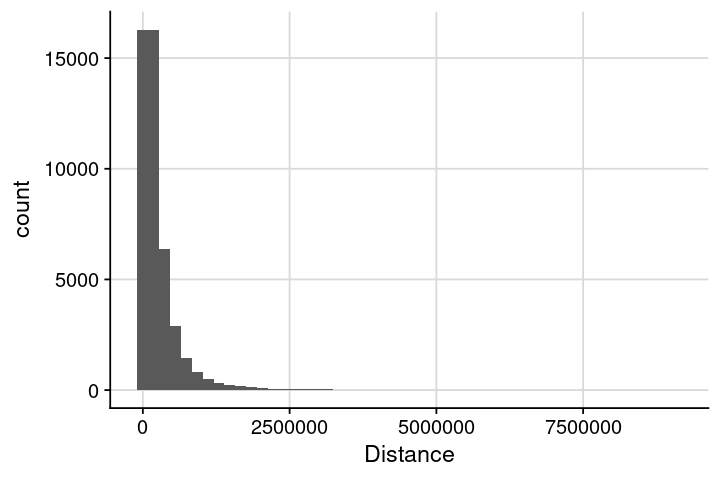

In [10]:
dat = dat_region_loop
gpt = ggplot(dat, aes(x=Distance)) + 
    geom_histogram(bins=50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=4, repr.plot.width=6)
print(gpt)

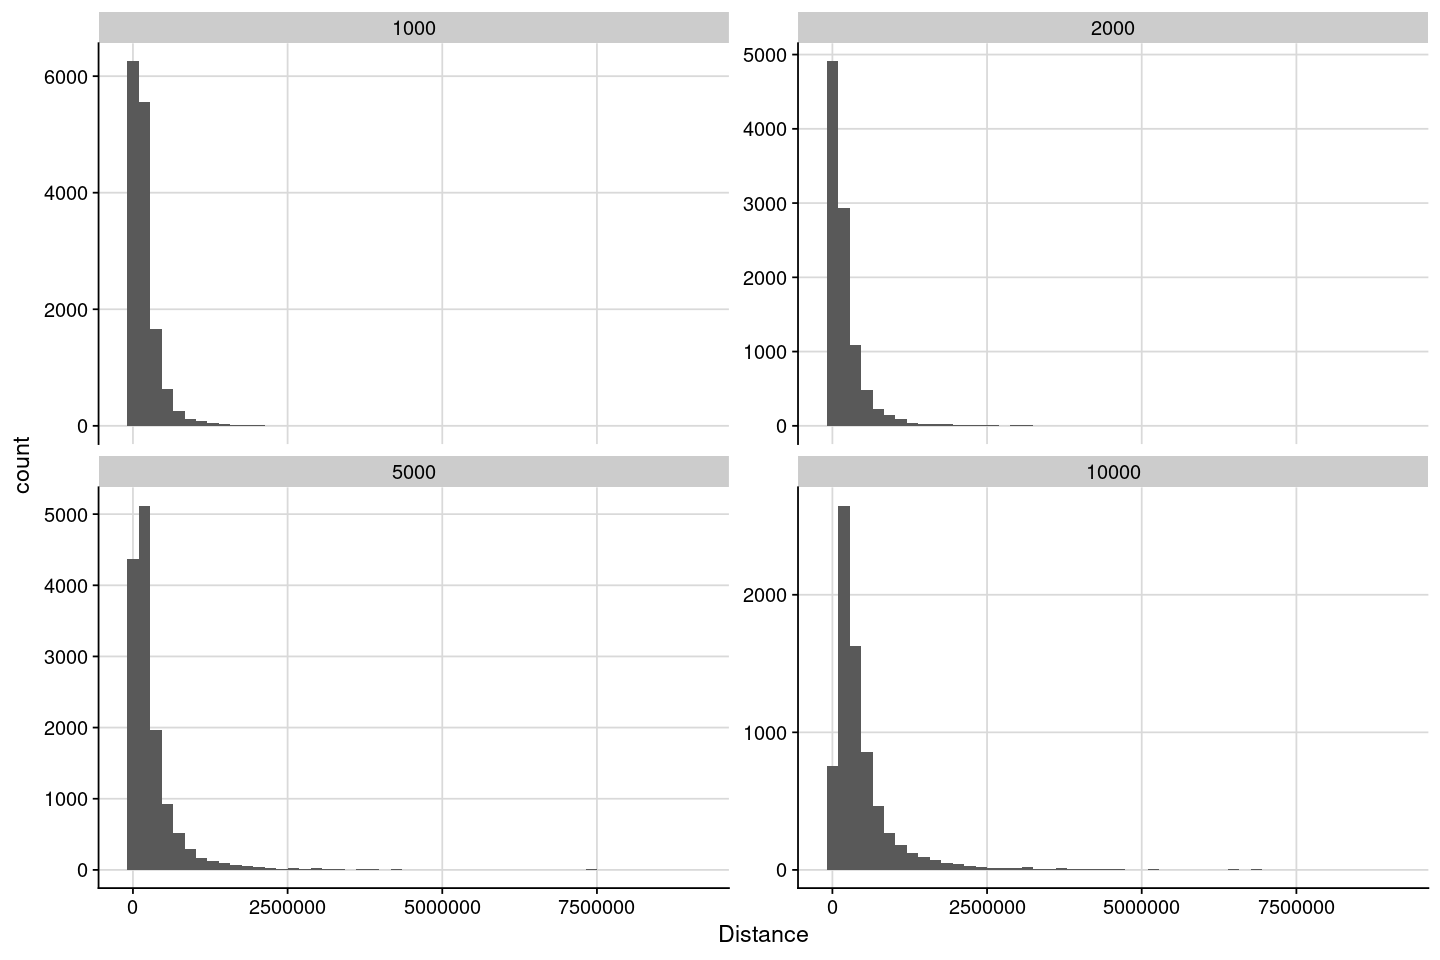

In [11]:
dat = dat_region_loop

gpt = ggplot(dat, aes(x=Distance)) + 
    geom_histogram(bins=50) +
    theme_cowplot() +
    background_grid() +
    facet_wrap(~Size, scale = "free_y")

options(repr.plot.height=8, repr.plot.width=12)
print(gpt)